[[0.054 0.054 0.054 0.054 0.054]
 [0.126 0.126 0.126 0.126 0.126]
 [0.15  0.15  0.15  0.15  0.15 ]
 [0.126 0.126 0.126 0.126 0.126]
 [0.054 0.054 0.054 0.054 0.054]]


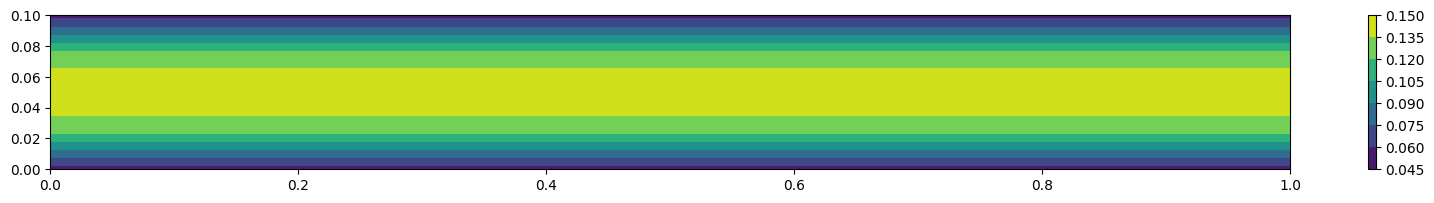

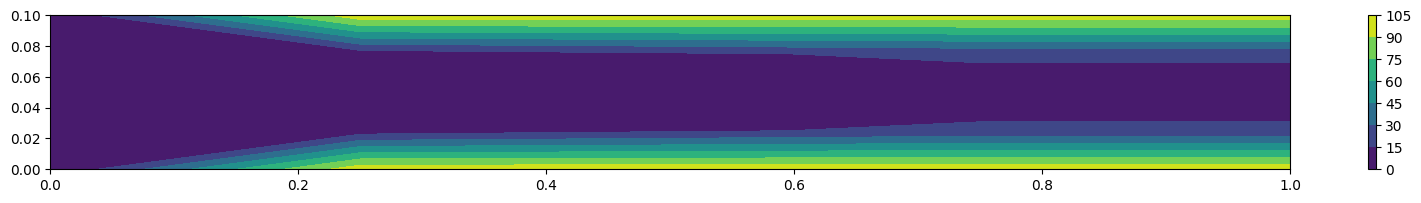

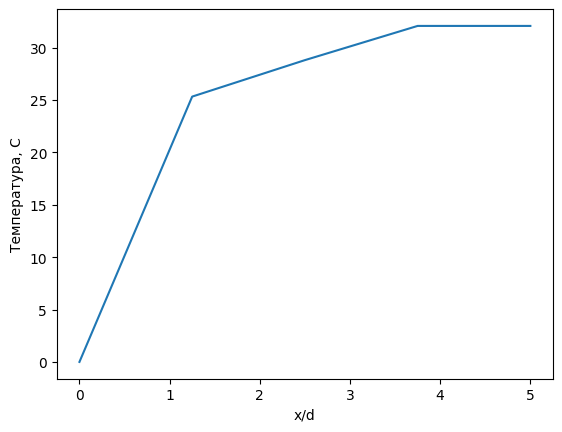

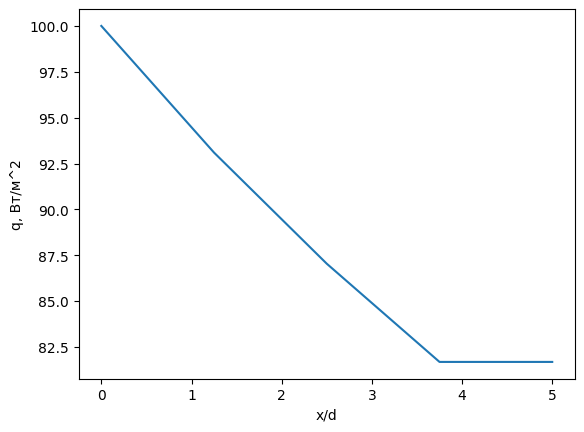

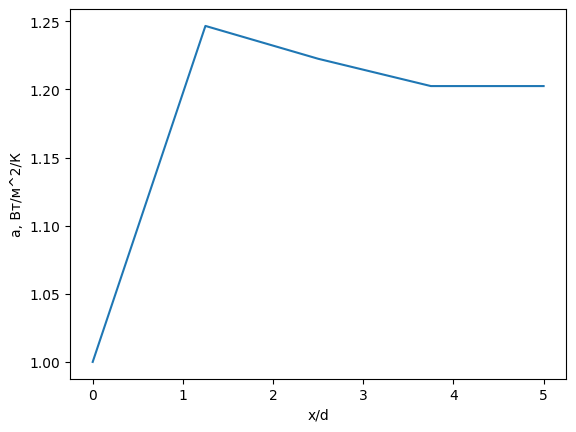

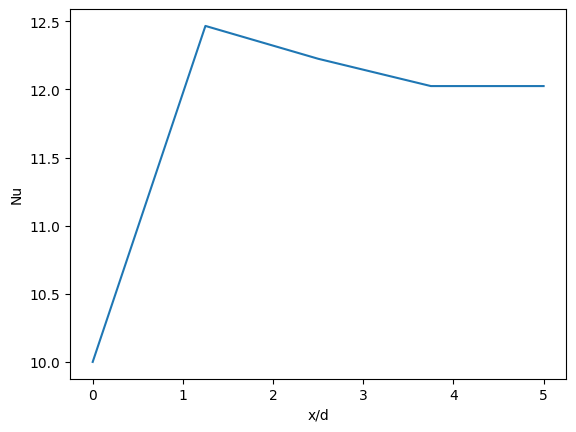

In [2]:
import numpy as np
import matplotlib.pyplot as plt

T0 = 0
Tw = 100

w0 = 0.1

H = 0.1
L = 1

N = 5
M = 5

dx = L/N
dy = H/M

ro = 1
cp = 1000
lamda = 0.02
a = lamda/cp/ro

U = np.zeros((M,N))
for i in range(N):
    for j in range(M):
        y = 0.5*H-(dy/2+j*dy)
        U[j,i] = 1.5*w0*(1-(4*y**2/H**2))



A = np.zeros((M * N, M * N))
B = np.zeros(N * M)

for i in range(0, N):
    A[i, i] = 1
    B[i] = Tw
    A[N * M - i - 1, N * M - i - 1] = 1
    B[N * M - i - 1] = Tw

for i in range(0, M):
    A[i * N, i * N] = 1
    B[i * N] = T0
    if i != 0 and i != M - 1:
        A[i * N + N - 1, i * N + N - 1] = -1
        A[i * N + N - 1, i * N + N - 2] = 1
        B[i * N + N - 1] = 0

for i in range(1, M - 1):
    for j in range(1, N - 1):
        A[i * N + j, i * N + j] = -1 * U[i, j] * dy - 2 * a * dy / dx - 2 * a * dx / dy  # 0.5*U[i,j-1]*dy-0.5*U[i,j+1]*dy-2*a*dy/dx-2*a*dx/dy#
        A[i * N + j, i * N + j + 1] = a * dy / dx  # a*dy/dx-0.5*U[i,j+1]*dy#
        A[i * N + j, i * N + j - 1] = a * dy / dx + U[i, j - 1] * dy  # a*dy/dx+0.5*U[i,j-1]*dy
        A[i * N + j, i * N + j + N] = a * dx / dy
        A[i * N + j, i * N + j - N] = a * dx / dy

t = np.linalg.solve(A, B)
T = np.zeros((M, N))
for i in range(0, M):
    for j in range(0, N):
        T[i, j] = t[i * N + j]


X = np.linspace(0, L, N)
Y = np.linspace(0, H, M)

plt.figure(figsize=(20, 2))
plt.contourf(X, Y, U)
plt.colorbar()
plt.show()

plt.figure(figsize=(20, 2))
plt.contourf(X, Y, T)
plt.colorbar()
plt.show()

Tav = np.zeros(N)
qc = np.zeros(N)
alph = np.zeros(N)
Nu = np.zeros(N)

for i in range(0, N):
    for j in range(0, M):
        Tav[i] += T[j, i] * U[j, i] * dy
    Tav[i] = Tav[i] / w0 / H
    qc[i] = (Tw - T[1, i]) / dy * lamda
    alph[i] = qc[i] / (Tw - Tav[i])
    Nu[i] = alph[i] * 2 * H / lamda

plt.plot(X / 2 / H, Tav)
plt.ylabel('Температура, C')
plt.xlabel('x/d')
plt.show()

plt.plot(X / 2 / H, qc)
plt.xlabel('x/d')
plt.ylabel('q, Вт/м^2')
plt.show()

plt.plot(X / 2 / H, alph)
plt.ylabel('a, Вт/м^2/К')
plt.xlabel('x/d')
plt.show()

plt.plot(X / 2 / H, Nu)
plt.xlabel('x/d')
plt.ylabel('Nu')
plt.show()